<h1><center>TDA and Statistics using Gudhi Python Library </center></h1>

<h1><center> Introduction to simplex trees </center></h1>

Authors : F. Chazal and B. Michel

In [69]:
from IPython.display import Image
from os import chdir
import numpy as np
import gudhi as gd
import random as rd
import matplotlib.pyplot as plt

# General pipeline for TDA



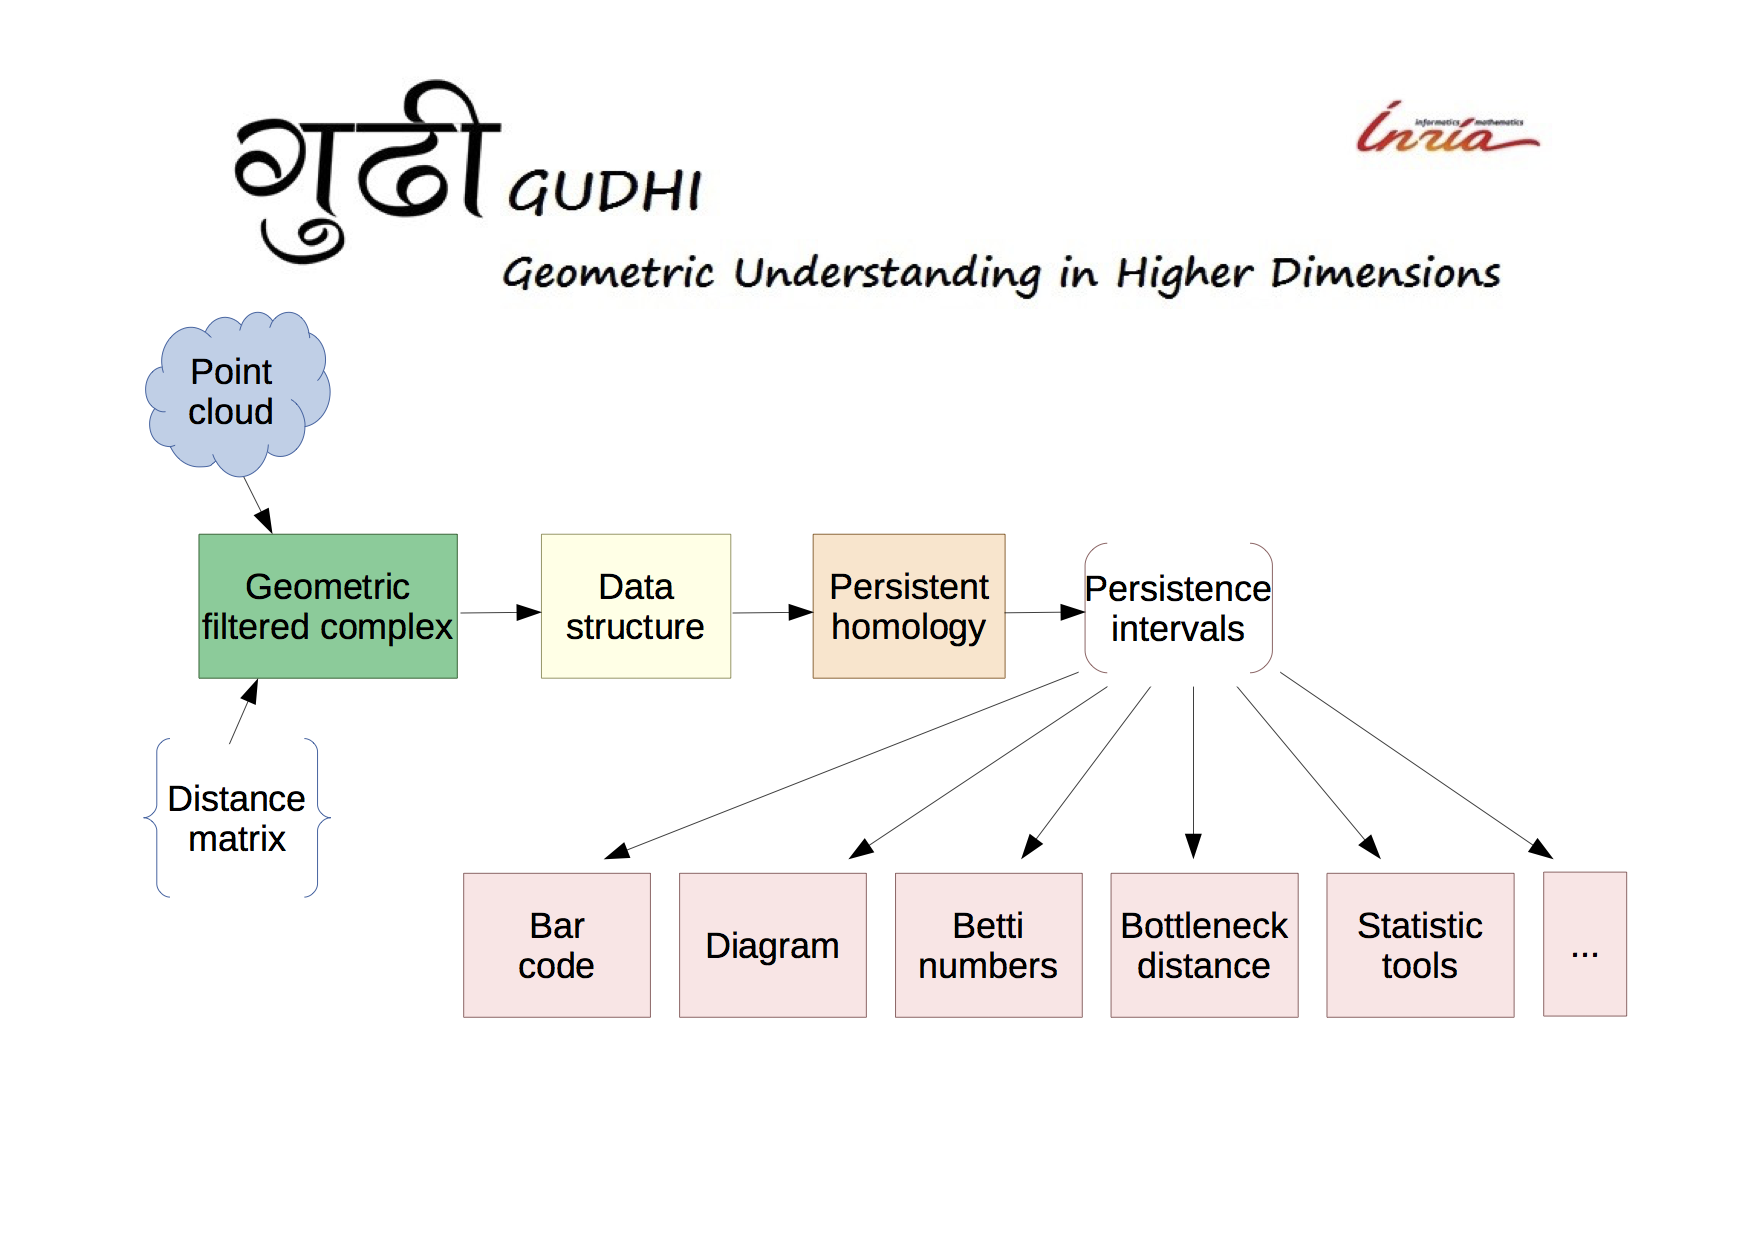

In [70]:
Image(filename="SlidesGudhi/GeneralPipeLine.png") 

In Gudhi, (filtered) simplicial complexes are encoded through a data structure called simplex tree. Here is a very simple example illustrating the use of simplex tree to represent simplicial complexes. See the [Python Gudhi documentation](http://gudhi.gforge.inria.fr/python/latest/simplex_tree_ref.html#) for a complete list of functionalities. 

Let's create our first simplicial complex, represented by a simplex tree :

In [71]:
st = gd.SimplexTree()

The `st` object has class `SimplexTree` with several usufull methods for the practice of TDA.

The `insert()` method can be used to insert simplices in the simplex tree. Vertices can be indexed by integers as follows:

In [72]:
st.insert([0,1])
st.insert([1,2])
st.insert([3,1])

True

If the simplex is already in the filtration then the `insert()` method outputs the boolean `False`.

In [73]:
st.insert([3,1])

False

We obtain the list of all the simplices with the `get_filtration()` method : 

In [74]:
st_list = st.get_filtration() 

`st_list` is a list and we thus we can iterate on its elements. Each element in the list is a tuple that contains a simplex and the filtration level.

The filtration level corresponds gives at what time the simplex appears in the filtration. By defaulty the simplexes are inserted at level = 0 (see further)

In [75]:
for splx in st_list :
    print(splx)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([1, 3], 0.0)


Notice that inserting an edge automatically insert its vertices (if they were not already in the complex)

### Simplex tree description

The dimension of the simplex tree is given by the `dimension()` method 

In [76]:
st.dimension()

1

It is possible to compute  the number of vertices in the simplex tree

In [77]:
st.num_vertices()

4

In the same way, for the number of simplices:

In [78]:
st.num_simplices()

7

The skeleton for every dimension can be aslo computed with the `get_skeleton_tree()` method 

In [79]:
print(st.get_skeleton(1))

[([0, 1], 0.0), ([0], 0.0), ([1, 2], 0.0), ([1, 3], 0.0), ([1], 0.0), ([2], 0.0), ([3], 0.0)]


One can also test if a simplex is already in the filtration with the `find()` method:

In [80]:
st.find([2, 4])

False

### Filtration levels

We can insert simplices at different filtration levels. For instances with triangles:

In [81]:
st.insert([0,1,2],filtration=0.1)
st.insert([1,2,3],filtration=0.2)
st.insert([0,1,3],filtration=0.4)
st_list  = st.get_filtration() 

for splx in st_list :
    print(splx)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([1, 3], 0.0)
([0, 2], 0.1)
([0, 1, 2], 0.1)
([2, 3], 0.2)
([1, 2, 3], 0.2)
([0, 3], 0.4)
([0, 1, 3], 0.4)


If we add a new simplex with a given filtration values, all its faces that were not in the complex before are added with the same filtration value :

In [82]:
st.insert([2,3,4],filtration=0.7)
st_list = st.get_filtration()
for splx in st_list:
    print(splx)   

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([1, 3], 0.0)
([0, 2], 0.1)
([0, 1, 2], 0.1)
([2, 3], 0.2)
([1, 2, 3], 0.2)
([0, 3], 0.4)
([0, 1, 3], 0.4)
([4], 0.7)
([2, 4], 0.7)
([3, 4], 0.7)
([2, 3, 4], 0.7)


The `assign_filtration()` method can be used to assign a filtration value to a simplex that is 
already in the filtration.

In [83]:
st.assign_filtration([3],filtration=0.8)
st_list = st.get_filtration()
for splx in st_list:
    print(splx)   

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([1, 2], 0.0)
([1, 3], 0.0)
([0, 2], 0.1)
([0, 1, 2], 0.1)
([2, 3], 0.2)
([1, 2, 3], 0.2)
([0, 3], 0.4)
([0, 1, 3], 0.4)
([4], 0.7)
([2, 4], 0.7)
([3, 4], 0.7)
([2, 3, 4], 0.7)
([3], 0.8)


But this simplex is not a filtered simplicial complex because the filtration level of the vertex 3 is higher then the filtration level of the edge 2-3. We can use the  this problem with the 

In [84]:
st.make_filtration_non_decreasing()
st_list = st.get_filtration()
for splx in st_list:
    print(splx)  

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([1, 2], 0.0)
([0, 2], 0.1)
([0, 1, 2], 0.1)
([4], 0.7)
([2, 4], 0.7)
([3], 0.8)
([0, 3], 0.8)
([1, 3], 0.8)
([0, 1, 3], 0.8)
([2, 3], 0.8)
([1, 2, 3], 0.8)
([3, 4], 0.8)
([2, 3, 4], 0.8)


In this tutorial we will study three datasets :
+ 3d acceleration for three walkers. 
+ Protein binding : closed and open forms of the maltose-binding protein (MBP), a large biomolecule consisting of 370 amino acid residues
+ crater data : point cloud in $\mathbb R^2$

For each dataset, we load the data in Python, we create various filtrations of simplicial complexes and we plot persistence diagrams.

#### Python Modules

We need the following Python modules:

In [7]:
import numpy as np
import pandas as pd
import pickle as pickle
import gudhi as gd  
from pylab import *
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image
from sklearn.neighbors.kde import KernelDensity
%matplotlib inline

#  Dataset  1: Sensor data

Download the dataset from this link
[data_acc](http://bertrand.michel.perso.math.cnrs.fr/Enseignements/TDA/data_acc) file (save the file without opening it).

We load the data with the pickle module :

In [8]:
f = open("data_acc","rb")
data = pickle.load(f)    
f.close()

For three walkers A, B and C, we have 100 times series of the acceleration recorded in $\mathbb R^3$ at 200 consecutive points. 

In [9]:
data_A = data[0]
data_B = data[1] 
data_C = data[2]
label = data[3]
print(label)

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C

The object <code>data_A</code> is a list of 100 time series of the 3d acceleration for Walker A, let's have a look at the dimensions of <code>data_A</code>:

In [10]:
print(np.shape(data_A))

(100, 200, 3)


We now represent the trajectory of accelerations for the first time serie of walker A :

/Users/bmichel/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:877: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


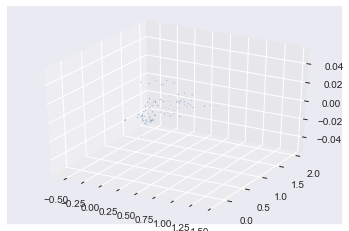

In [11]:
data_A_sample = data_A[0]
plt.gca(projection='3d')
plt.scatter(data_A_sample [:,0],data_A_sample [:,1],data_A_sample [:,2] )

### Rips filtration defined from a point cloud

[Documentation](http://gudhi.gforge.inria.fr/python/latest/rips_complex_user.html)


The <code>RipsComplex()</code> function creates a one-skeleton graph from a point cloud or from a distance matrix(see further): 

In [13]:
Rips_complex_sample = gd.RipsComplex(points = data_A_sample,max_edge_length=0.8 )

When creating a simplicial complex from this one-skeleton graph, Rips inserts the one skeleton graph into the data structure, and then expands the simplicial complex when required:

In [14]:
Rips_simplex_tree_sample = Rips_complex_sample.create_simplex_tree(max_dimension=3) 

### Persistence 
[Documentation](http://gudhi.gforge.inria.fr/python/latest/persistence_graphical_tools_user.html)

Now we can compute persistence on the simplex tree structure using the <code>persistence()</code> method:

In [15]:
diag_Rips = Rips_simplex_tree_sample.persistence()
diag_Rips

[(2, (0.18467330459489806, 0.19003814936217414)),
 (2, (0.2077507075342945, 0.21043404394251414)),
 (1, (0.48712364423111304, 0.6171653961743157)),
 (1, (0.30083677068802595, 0.3933337797685319)),
 (1, (0.27925822138479645, 0.36558945971950557)),
 (1, (0.27752945149118863, 0.3593309561685439)),
 (1, (0.4222930646802051, 0.49860549366608464)),
 (1, (0.18063993787366073, 0.24825211124379187)),
 (1, (0.13820579330114913, 0.1905343689180511)),
 (1, (0.20475722867337312, 0.24820590908558166)),
 (1, (0.09431151230894352, 0.13756482377410295)),
 (1, (0.29406771695478573, 0.33725852348606405)),
 (1, (0.29302384857379776, 0.3361010079812317)),
 (1, (0.11474393691171661, 0.15024735235271203)),
 (1, (0.15214484619927154, 0.1834244192848924)),
 (1, (0.0988476350045867, 0.12681166596965754)),
 (1, (0.4714925543632689, 0.49554154652864374)),
 (1, (0.10573652128758541, 0.12823135784198816)),
 (1, (0.11781728562906214, 0.13940711665478195)),
 (1, (0.05312372783417972, 0.07386673382518012)),
 (1, (0.15

We also have access to persistence_intervals per dimension using the <code>persistence_intervals_in_dimension()</code>  method.

For dimension 0:

In [16]:
Rips_simplex_tree_sample.persistence_intervals_in_dimension(0)

[(0.0, 0.010037972604067026),
 (0.0, 0.011934283430520687),
 (0.0, 0.017975277911620735),
 (0.0, 0.018713766643837386),
 (0.0, 0.018944080262710026),
 (0.0, 0.02139398300924822),
 (0.0, 0.02153918522135876),
 (0.0, 0.022836281768273937),
 (0.0, 0.02404079478719446),
 (0.0, 0.02528062297491887),
 (0.0, 0.02543660160084278),
 (0.0, 0.02656518191166776),
 (0.0, 0.026689955732447364),
 (0.0, 0.027999307509293882),
 (0.0, 0.028305883664001743),
 (0.0, 0.030244785153807872),
 (0.0, 0.030334711041972974),
 (0.0, 0.030841760585284376),
 (0.0, 0.03270191445466141),
 (0.0, 0.033380721157578334),
 (0.0, 0.03371579898207958),
 (0.0, 0.034473350301356065),
 (0.0, 0.035402079628179935),
 (0.0, 0.03635244907843206),
 (0.0, 0.036790327465245506),
 (0.0, 0.037527917767976426),
 (0.0, 0.038341942830274006),
 (0.0, 0.03952421033999288),
 (0.0, 0.04042591259328599),
 (0.0, 0.04086899075093489),
 (0.0, 0.041456725944049144),
 (0.0, 0.04152965660826004),
 (0.0, 0.041682370973830186),
 (0.0, 0.04269659467685

Finally we can plot the persistence diagram:

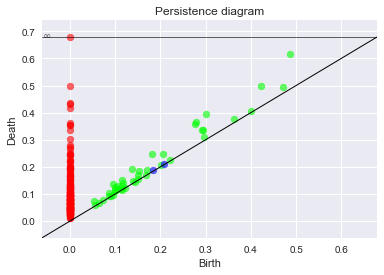

In [17]:
gd.plot_persistence_diagram(diag_Rips)

### Alpha Complex filtration defined from a point cloud in $\mathbb R^3$

[Documentation](http://gudhi.gforge.inria.fr/python/latest/alpha_complex_user.html)

<img src="SlidesGudhi/Alpha.png" alt="Alpha" style="width:1000px">

We define an alpha_complex for <code>data_A_sample</code> by constructing a Simplex_tree using Delaunay Triangulation.

In [18]:
Alpha_complex_sample = gd.AlphaComplex(points = data_A_sample)
Alpha_simplex_tree_sample = Alpha_complex_sample.create_simplex_tree(max_alpha_square=0.3) 

####  Persistence [Documentation](http://gudhi.gforge.inria.fr/python/latest/persistence_graphical_tools_user.html)

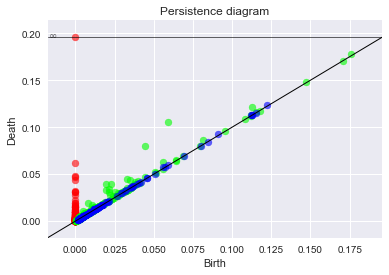

In [19]:
diag_Alpha = Alpha_simplex_tree_sample.persistence()
gd.plot_persistence_diagram(diag_Alpha)

#  Dataset  2: Protein Binding 

In [20]:
Image("Protein.png",width=400)

<center> [[From Kovacev-Nikolic 2016](https://arxiv.org/pdf/1412.1394.pdf)] </center>

With this dataset, we study configurations of protein binding. This example is borrowed from 
[Using persistent homology and dynamical distances to analyze protein binding, V. Kovacev-Nikolic, P. Bubenik, D. Nikolic and G. Heo. Stat Appl Genet Mol Biol 2016 ](https://arxiv.org/pdf/1412.1394.pdf).

The paper compares closed and open forms of the maltose-binding protein (MBP), a large biomolecule consisting of 370 amino acid residues. The analysis is not based on geometric distances in $\mathbb R^3$ but on a metric of *dynamical distances* defined by
$$D_{ij} = 1 - |C_{ij}|,$$
where $C$ is the correlation matrix between residues.

Correlation matrices between residues can be found at this [link](https://www.researchgate.net/publication/301543862_corr) (thank you to the authors for sharing data).

The next statments will be usefull to load the fourteen correlation matrices in Python:

In [21]:
path_file = "./Peter corr_ProteinBinding/"
files_list = [
'1anf.corr_1.txt',
'1ez9.corr_1.txt',
'1fqa.corr_2.txt',
'1fqb.corr_3.txt',
'1fqc.corr_2.txt',
'1fqd.corr_3.txt',
'1jw4.corr_4.txt',
'1jw5.corr_5.txt',
'1lls.corr_6.txt',
'1mpd.corr_4.txt',
'1omp.corr_7.txt',
'3hpi.corr_5.txt',
'3mbp.corr_6.txt',
'4mbp.corr_7.txt']
len(files_list)

14

We now load the 14 correlation matrices using the <code>pandas</code> module:

In [22]:
corr_list = [pd.read_csv(path_file+u,
                         header=None,
                         delim_whitespace=True) for u in files_list]

where <code>corr_list</code> is the list of the 14 correlation matrices.    
We now iterate in the list to compute the matrix of distances associated to each configuration:

In [23]:
dist_list = [1- np.abs(c) for c in corr_list]

We can print the first lines of the distance matrices using the method of distances with the <code>head()</code> method for a <code>pandas</code> object:

In [24]:
mat_dist = dist_list[0]
mat_dist.head()

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
0,0.000000,0.076200,0.171364,0.378207,0.461747,0.493499,0.478665,0.432338,0.568455,0.639504,...,0.694159,0.723059,0.660802,0.614051,0.660601,0.686334,0.640850,0.617944,0.695108,0.748451
1,0.076200,0.000000,0.122763,0.233837,0.350744,0.406213,0.425202,0.381799,0.541636,0.646580,...,0.817461,0.844610,0.781266,0.740222,0.793586,0.808770,0.754748,0.730646,0.804961,0.848953
2,0.171364,0.122763,0.000000,0.084642,0.131528,0.148980,0.162259,0.164105,0.333175,0.480605,...,0.782234,0.813481,0.718610,0.666239,0.742311,0.740322,0.667525,0.653546,0.742430,0.766030
3,0.378207,0.233837,0.084642,0.000000,0.045478,0.132107,0.217299,0.293902,0.494307,0.675635,...,0.913930,0.929677,0.853475,0.813717,0.868041,0.856491,0.797437,0.781044,0.842591,0.858435
4,0.461747,0.350744,0.131528,0.045478,0.000000,0.059280,0.146850,0.297257,0.511751,0.734412,...,0.967195,0.979578,0.889375,0.841519,0.895967,0.874522,0.804538,0.779865,0.841695,0.849836


### Rips filtration defined from a matrix of distances 

[Documentation](http://gudhi.gforge.inria.fr/python/latest/rips_complex_user.html#example-from-off-file)

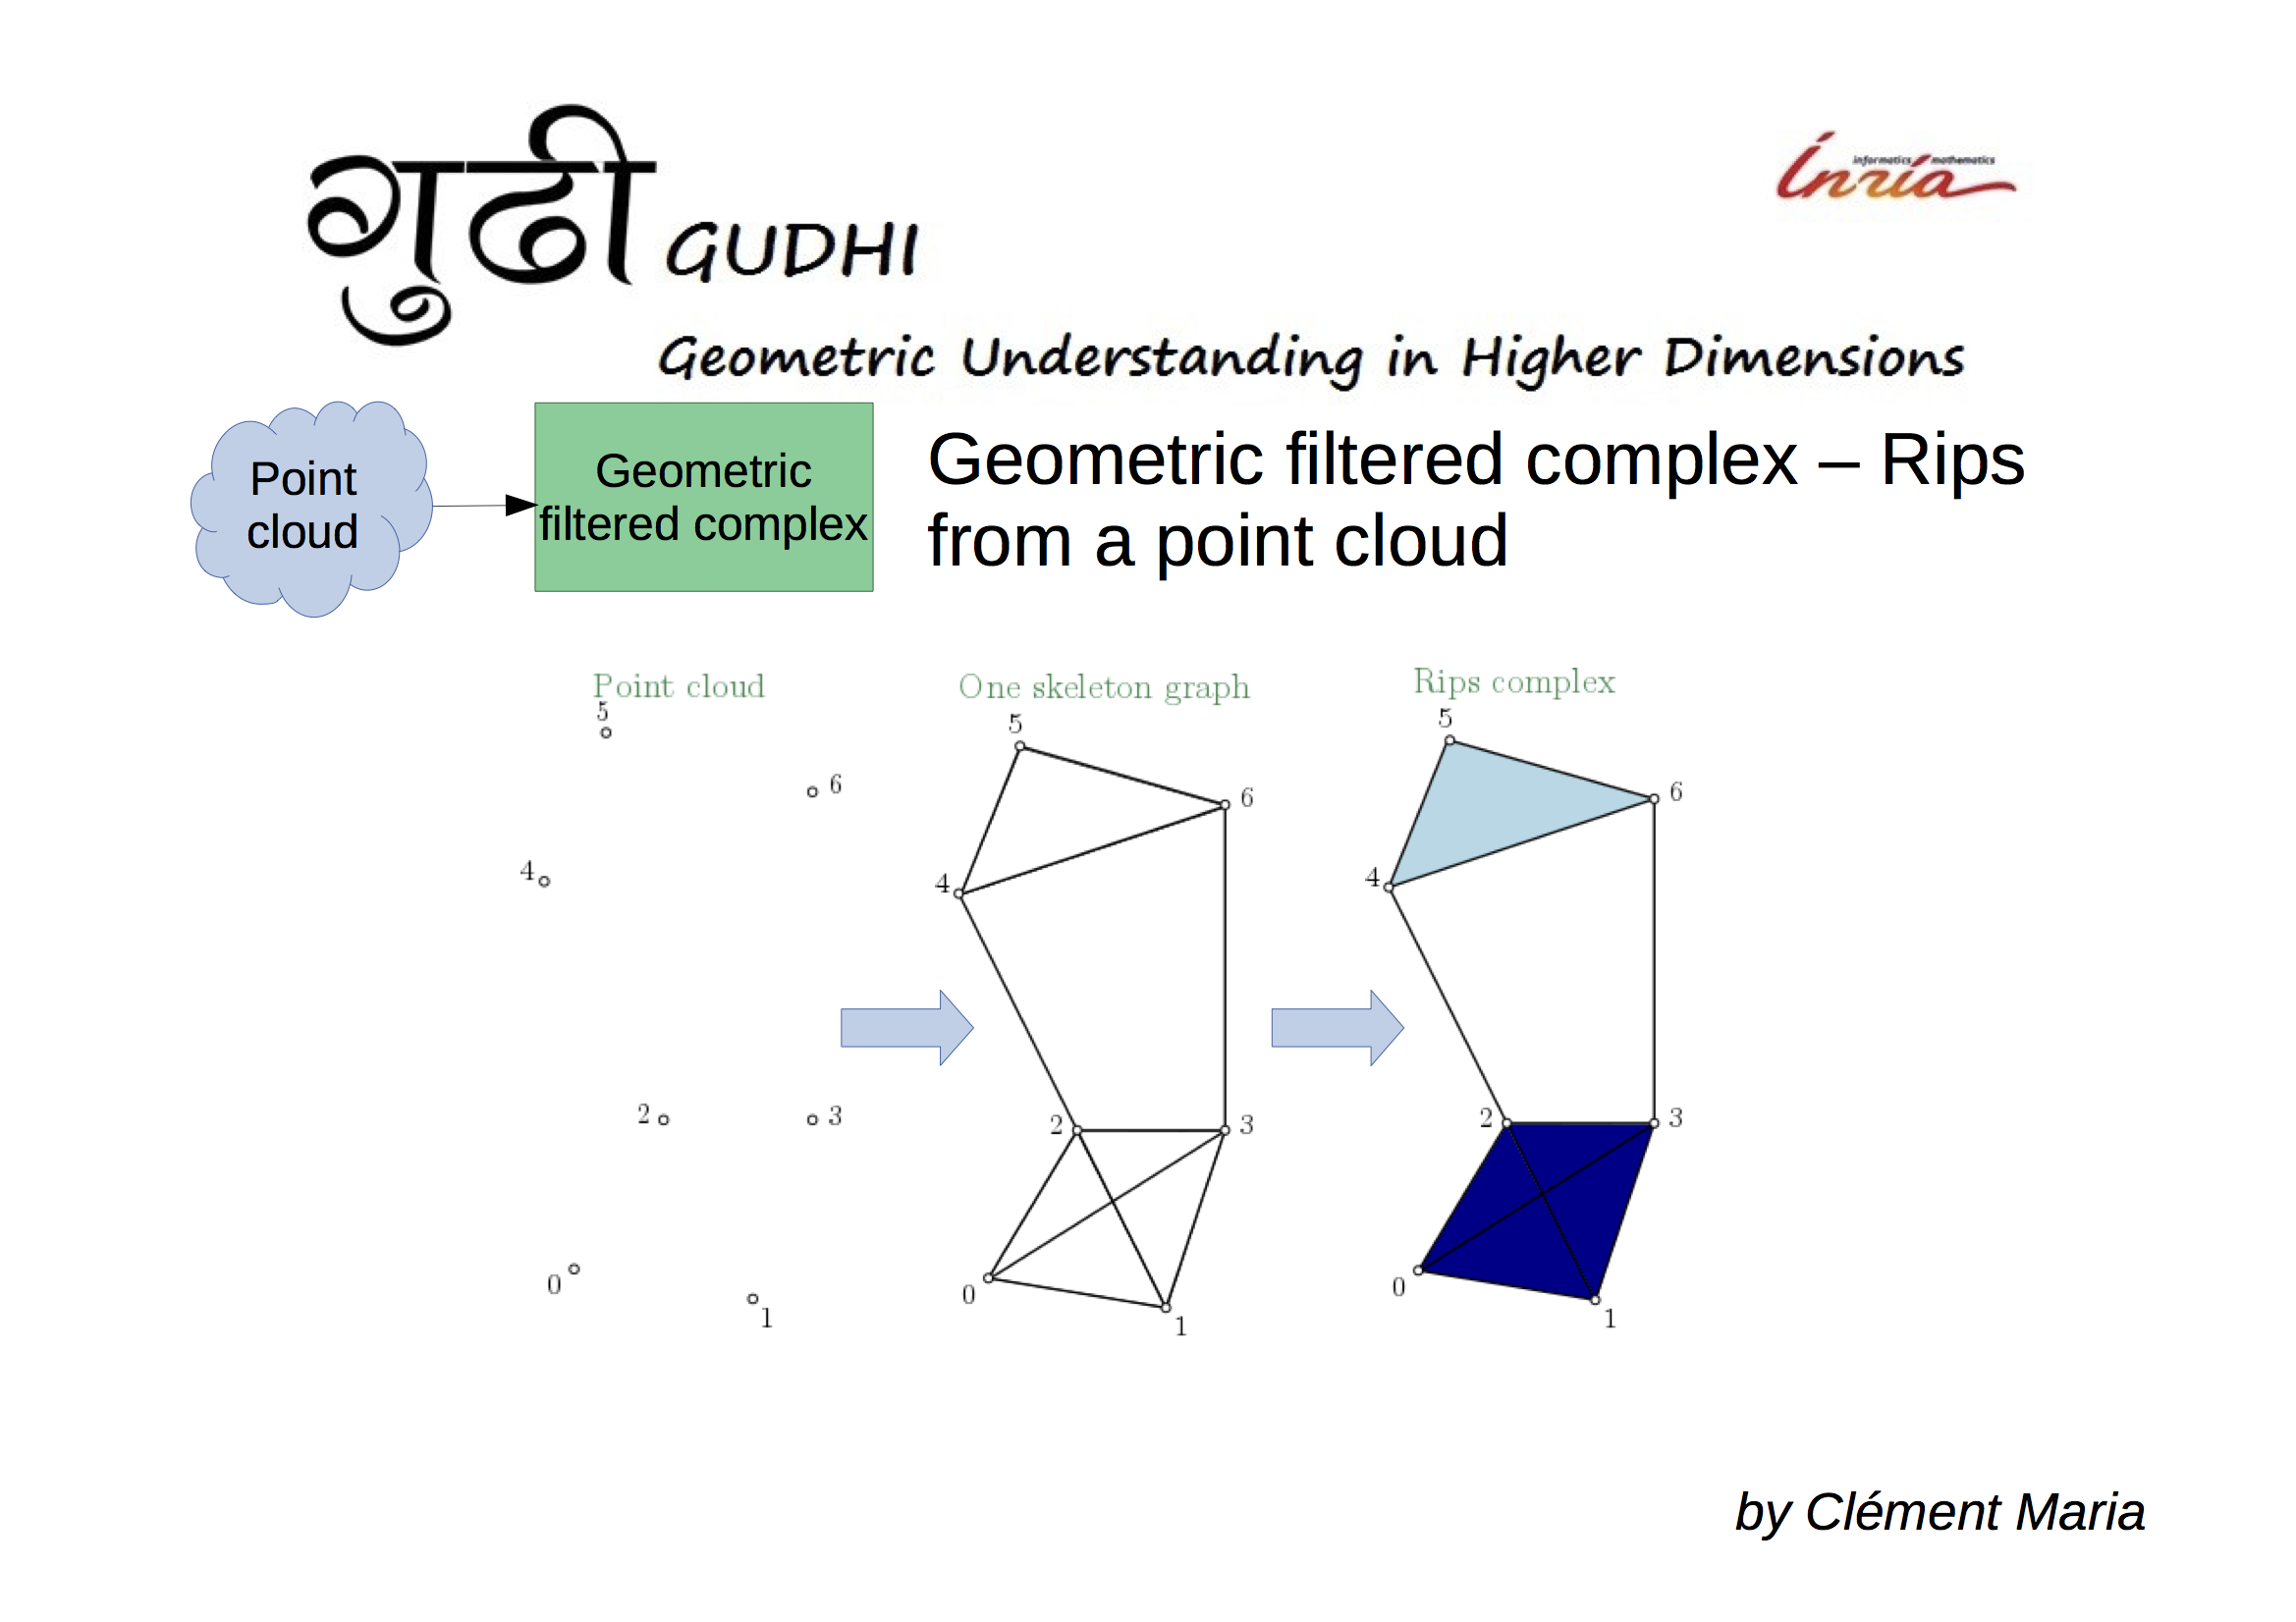

In [25]:
Image("SlidesGudhi/RipsDistanceMatrix.png")

We compute the Rips complex filtration from this matrix of distance:

In [26]:
rips_complex_ref = gd.RipsComplex(distance_matrix=mat_dist.values,
                                  max_edge_length=0.8) 

and then we can create the simplex tree for the Rips filtration:

In [27]:
simplex_tree_ref = rips_complex_ref.create_simplex_tree(max_dimension=2)

### Persistence

<p style="border:2px; border-style:solid; padding: 0.5em;border-color:red"> 
<b> Exercice. </b> Compute and plot the persistence for the Rips filtration.
 </p>

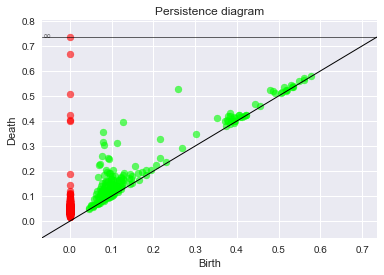

In [28]:
diag_ref = simplex_tree_ref.persistence()
gd.plot_persistence_diagram(diag_ref)

# Dataset 3: Crater dataset

We use the [crater dataset](http://bertrand.michel.perso.math.cnrs.fr/Enseignements/TDA/crater_tuto) to illustrate how to compute the cubical complex filtration.

In [29]:
f = open("crater_tuto","rb")
crater = pickle.load(f)
f.close()

The point cloud is composed of a center annulus and four clusters:

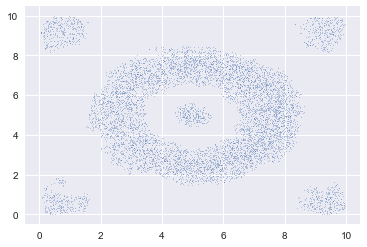

In [30]:
plt.scatter(crater[:,0],crater[:,1],s=0.1)

We can also visualize the density of the distribution (with a standard 2d-kernel estimator):

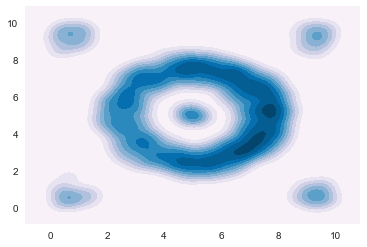

In [31]:
sns.kdeplot(crater, shade = True, cmap = "PuBu",bw=.3)

### Cubical filtration
[Documentation](http://gudhi.gforge.inria.fr/python/latest/cubical_complex_user.html)

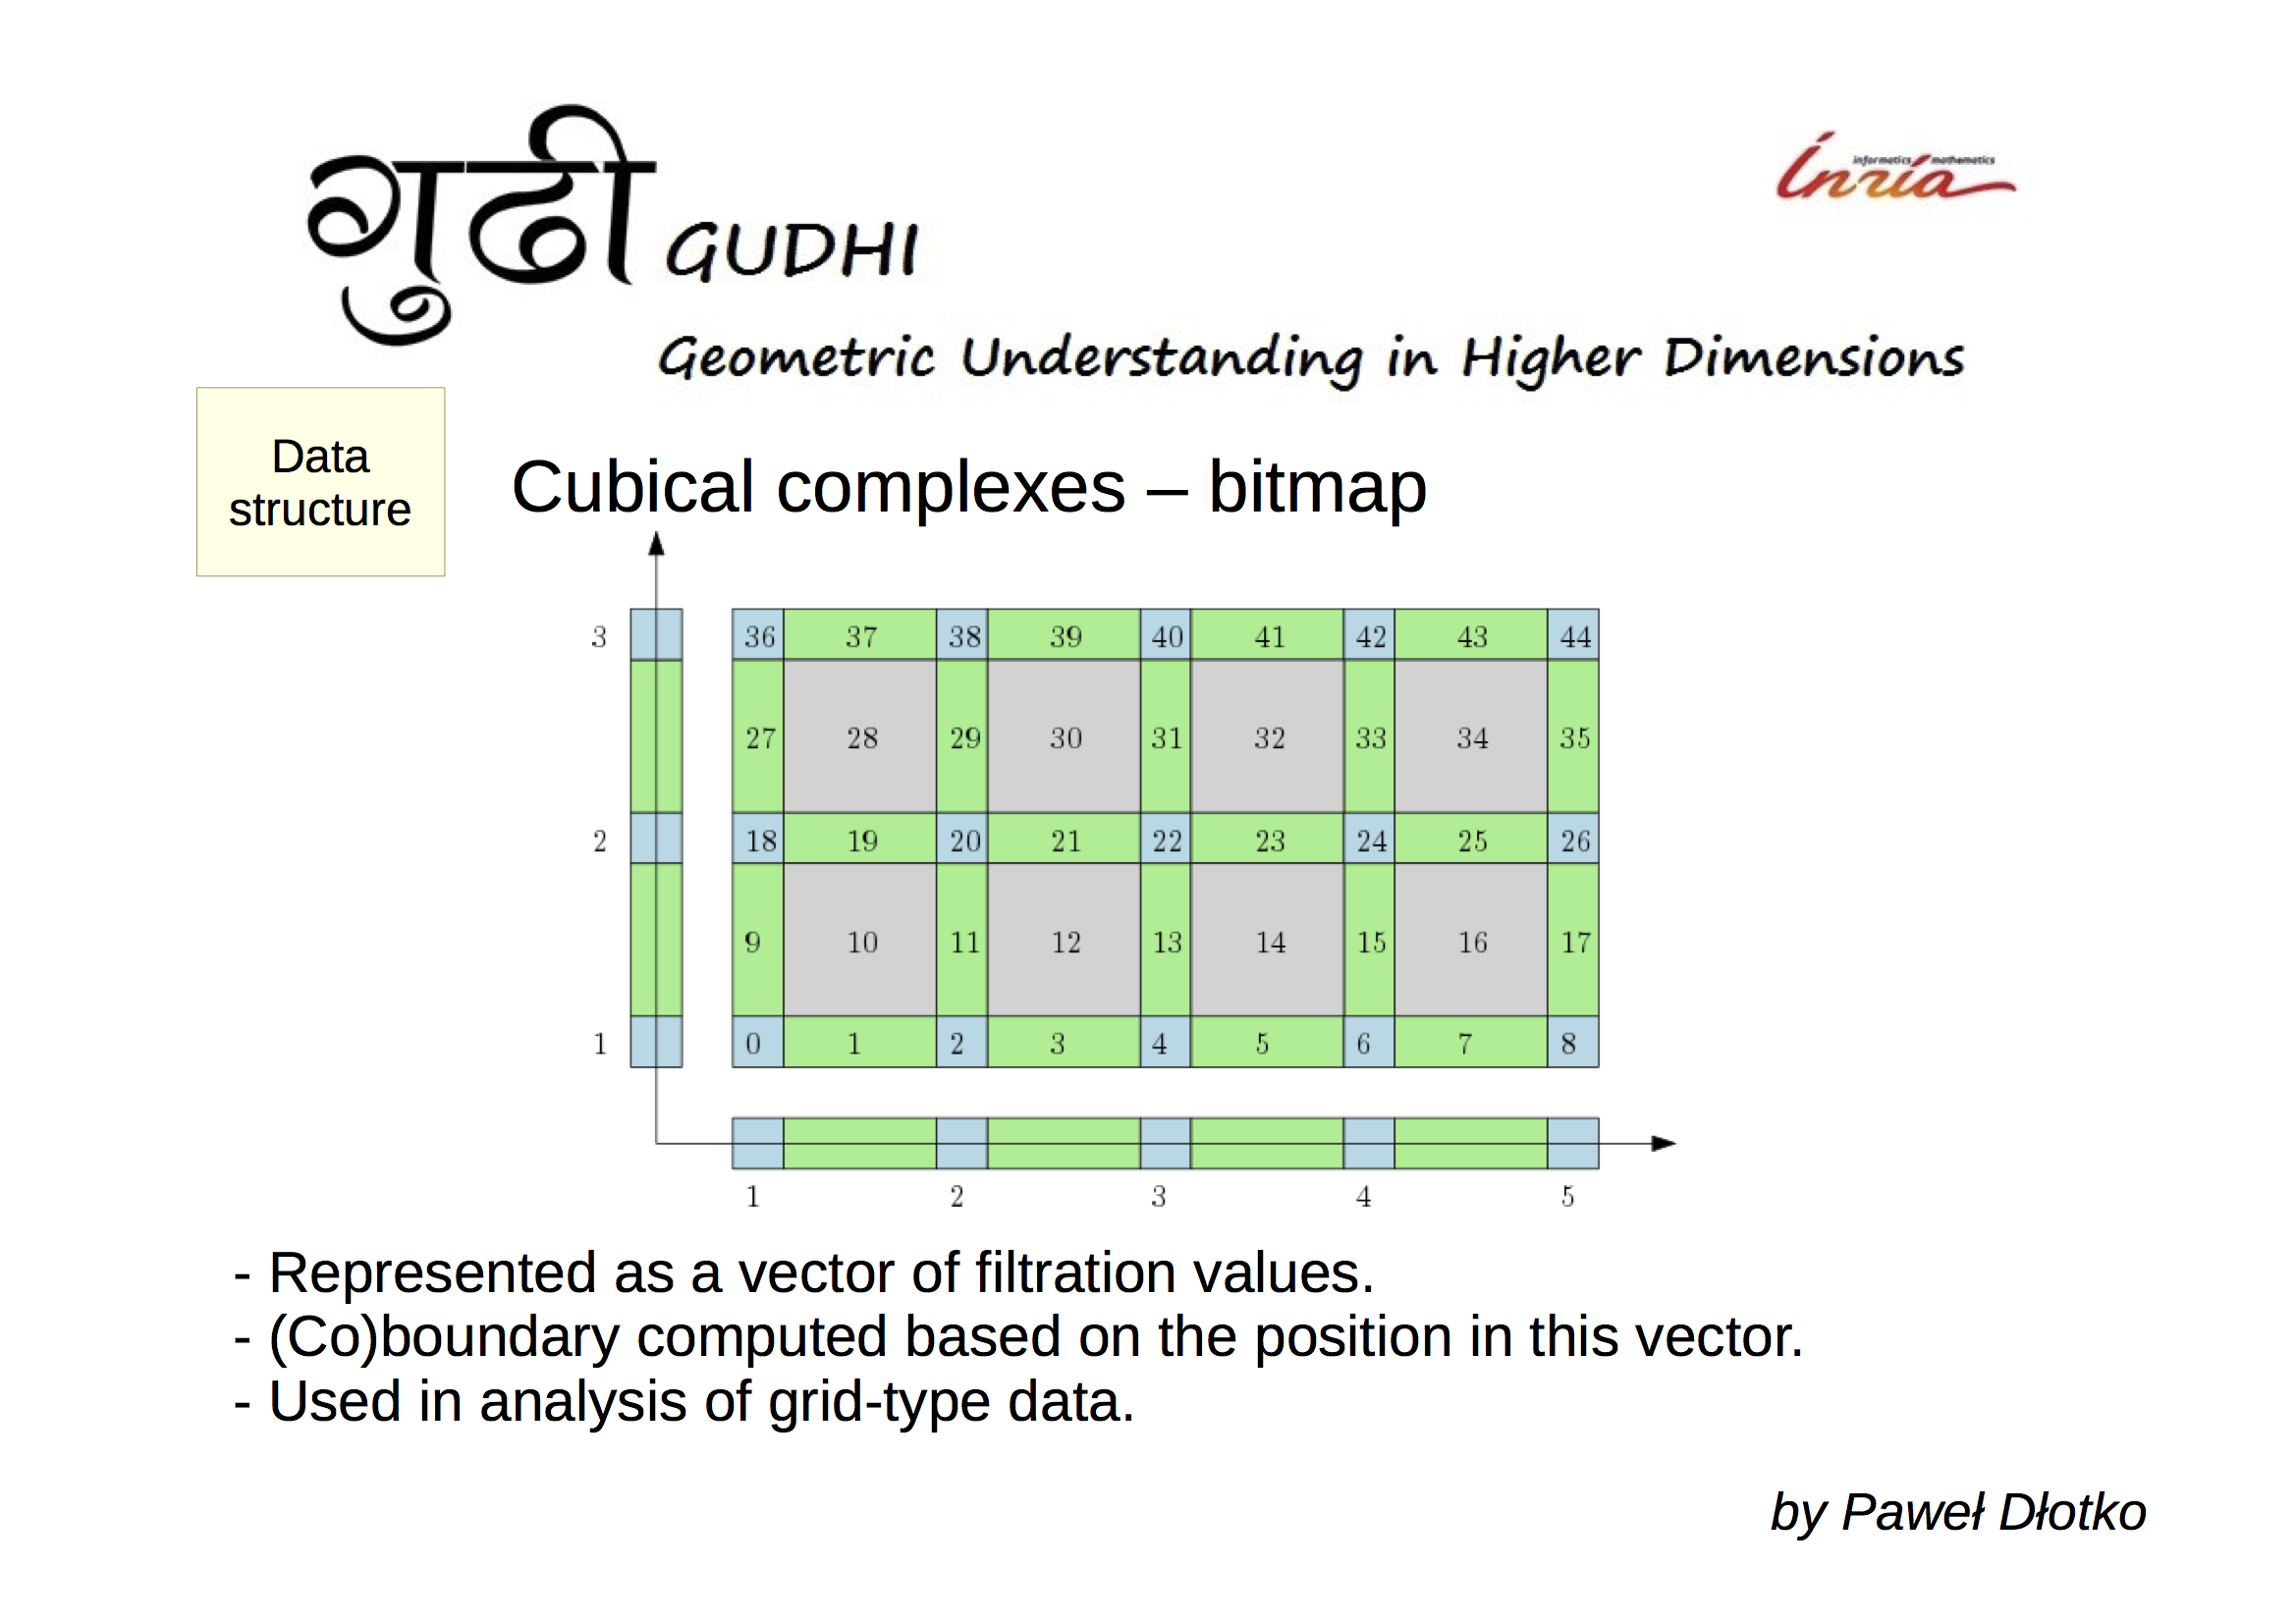

In [32]:
Image("SlidesGudhi/Cubical.png")

We create a grid on [0,10] x [0,10]

In [33]:
xval = np.arange(0,10,0.05)
yval = np.arange(0,10,0.05)
nx = len(xval)
ny = len(yval)

and we compute a standard kernel density estimator on this grid:

In [34]:
kde = KernelDensity(kernel='gaussian', bandwidth=0.3).fit(crater)
positions = np.array([[u,v] for u in xval for v in yval ])
scores =  -exp(kde.score_samples(X= positions))

In [35]:
print(max(scores))
print(min(scores))

-3.01565312194e-12
-0.0381888309901


Now we can compute the cubical Complex filtration:

In [36]:
cc_density_crater= gd.CubicalComplex(dimensions= [nx ,ny],
                                    top_dimensional_cells = scores)

Note that the filtration is not stored in simplex tree in this case. 

### Persistence

To compute persistent homology, we directly use the <code>persistence()</code> method for the CubicalComplex object:

In [37]:
pers_density_crater = cc_density_crater.persistence()

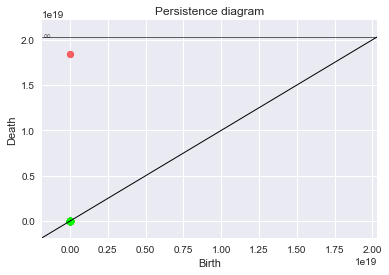

In [38]:
gd.plot_persistence_diagram(pers_density_crater)

It seems that the longest interval is not set at infinity:

In [39]:
pers_density_crater

[(1, (-0.02543885945226923, -0.0013721904033742861)),
 (1, (-0.002392925139894132, -0.0021101751354126357)),
 (1, (-0.002128770616911091, -0.0019334186106016945)),
 (1, (-0.002099504748084491, -0.0019483237232952905)),
 (1, (-0.0023357921272717593, -0.0022637102259464403)),
 (1, (-0.0018888743567167935, -0.0018625150849327396)),
 (1, (-0.0020890327923796382, -0.0020639793664016283)),
 (1, (-0.0020795334988030273, -0.00205464518963611)),
 (1, (-0.0019722405046820515, -0.001949411611527113)),
 (1, (-0.002053029273686075, -0.0020328307968777077)),
 (1, (-0.0031257162866984638, -0.0031094840042018117)),
 (1, (-0.002309243401949135, -0.00229439815691871)),
 (1, (-0.0021346791048090746, -0.002119938386275072)),
 (1, (-0.002085046465161946, -0.0020712426386026808)),
 (1, (-0.0030896714333155635, -0.0030767394803270444)),
 (1, (-0.002291418778587971, -0.002280029187755709)),
 (1, (-0.003075056467239267, -0.0030638815623353806)),
 (1, (-0.001983780982330259, -0.0019741533481695724)),
 (1, (-0.0

<p style="border:2px; border-style:solid; padding: 0.5em;border-color:red"> 
<b> Exercice. </b> Fix Pawel's code ;).
 </p>

In [40]:
pers_density_crater_inf = []
for l in pers_density_crater:
    if l[1][1] > 1000:
        pers_density_crater_inf.append((l[0],(l[1][0],inf)))
    else:
        pers_density_crater_inf.append(l)

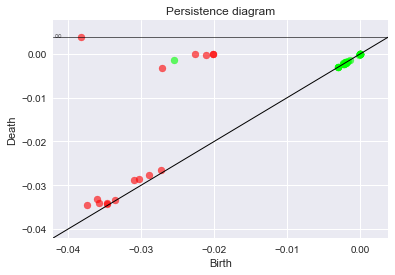

In [41]:
gd.plot_persistence_diagram(pers_density_crater_inf)